**To Plot a Graph of Receiver Operating Characteristic Curve (ROC) with FPR at the x axis and TPR at the y axis and to find the roc_auc score**

In [ ]:
prob_lr = clf_lr.predict_proba(x_test)
prob_knn = clf_knn.predict_proba(x_test)
prob_dtc = clf_dtc.predict_proba(x_test)

In [ ]:
#keeping only the 2nd column (positive values) and discarding the 1st column (negative values)
prob_lr =  prob_lr[:, 1]
prob_knn = prob_knn[:, 1]
prob_dtc = prob_dtc[:, 1]

In [ ]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, prob_lr)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, prob_knn)
fpr_dtc, tpr_dtc, thresh_dtc = roc_curve(y_test, prob_dtc)

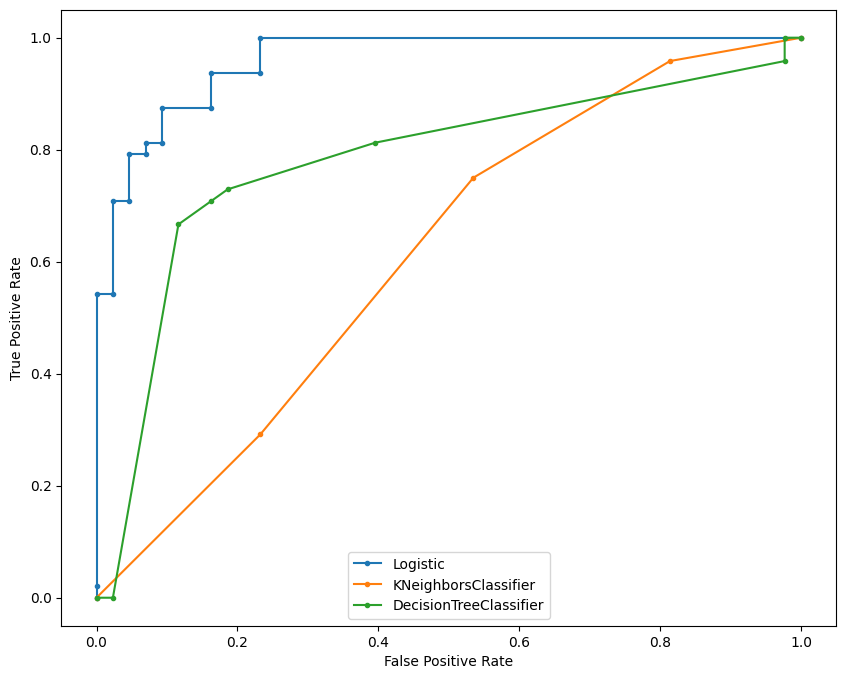

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(fpr_lr, tpr_lr, marker='.', label='Logistic')
ax.plot(fpr_knn, tpr_knn, marker='.', label='KNeighborsClassifier')
ax.plot(fpr_dtc, tpr_dtc, marker='.', label='DecisionTreeClassifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=8)

plt.show()

**From the above Graph it can be clearly interpreted that the area under the Logistic curve is more than the other two curves and hence provides a better accuracy.**

In [ ]:
from sklearn.metrics import roc_auc_score

auc_lr = roc_auc_score(y_test, prob_lr)
auc_knn = roc_auc_score(y_test, prob_knn)
auc_dtc = roc_auc_score(y_test, prob_dtc)

print(f'Logistic : ROC AUC = {round(auc_lr, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_knn, 3)*100} %')
print(f'Logistic : ROC AUC = {round(auc_dtc, 3)*100} %')

Logistic : ROC AUC = 96.0 %
Logistic : ROC AUC = 61.199999999999996 %
Logistic : ROC AUC = 77.9 %


The roc_auc_score can also be calculated using the above module.The roc_auc_score of LogisticRegression is 92.1% which is much greater than the other two.

**Code to allow user to query by providing details of a patient as input and determining whether the patient lives or dies**

In [ ]:
#from pandas.core.window.expanding import ExpandingGroupby
#from matplotlib.projections.polar import ThetaAxis
#n = int(input("Enter no of Patients who's Status is to be Determined :- "))

#def Prediction() :
  #age = int(input("Age of the Patient :- "))
  #sex = int(input("Sex of the Patient (0 - female & 1 - male) :- "))
  #cp = int(input("Chest Pain Type :- "))
  #trestbps = int(input("Resting Blood Pressure :- "))
  #chol = int(input("Serum Cholestrol :- "))
  #fbs = int(input("Fasting Blood Sugar :- "))
  #restecg = int(input("Resting ElectroCardiographic Result :- "))
  #thalach = int(input("Maximum Heart Rate Achieved :- "))
  #exang = int(input("Exercise-include angina (1 - True, 0 - False) :- "))
  #oldpeak = float(input("ST Depression induced by Exercise relative to Rest :- "))
  #slope = int(input("Slope of Peak Exercise ST segment :- "))
  #ca = int(input("No. of Major Vessels (0-3) :- "))
  #thal = int(input("Thalasemia Indicator :- "))
  #new_patient = np.array([age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal])

  #new_patient = new_patient.reshape(1,-1) #converting to 2D array

  #if clf_lr.predict(new_patient) == 0 :
   # return "The Patient with the above provided Vitals Dies!!!"
  #else :
   # return "The Patient with the above provided vitals Lives!!!"

#for i in range(n) :
 # print(Prediction())

Enter no of Patients who's Status is to be Determined :- 1
Age of the Patient :- 62
Sex of the Patient (0 - female & 1 - male) :- 1
Chest Pain Type :- 3
Resting Blood Pressure :- 145
Serum Cholestrol :- 228
Fasting Blood Sugar :- 1
Resting ElectroCardiographic Result :- 0
Maximum Heart Rate Achieved :- 145
Exercise-include angina (1 - True, 0 - False) :- 0
ST Depression induced by Exercise relative to Rest :- 2.2
Slope of Peak Exercise ST segment :- 0
No. of Major Vessels (0-3) :- 0
Thalasemia Indicator :- 1
The Patient with the above provided vitals Lives!!!


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**According to the above provided vitals taken from a random patient our model has predicted that the Patient Lives. The model can be used to check the status of any number of patients at a time which is time saving.**